In [1]:
!pip install piml

In [2]:
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import *

## Load bike share data

In [3]:
from piml import Experiment
exp = Experiment()

In [4]:
exp.data_loader("BikeSharing")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,16.0
1,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,40.0
2,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,32.0
3,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,13.0
4,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1.0,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,119.0
17375,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,89.0
17376,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,0.60,0.1642,90.0
17377,1.0,1.0,12.0,22.0,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,61.0


In [5]:
exp.data_summary( feature_exclude=['yr','holiday'])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='Data Shape:(17379, 13)')

In [6]:
exp.eda()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [7]:
exp.data_prepare(target='cnt', task_type='regression', test_ratio=0.4, random_state=0)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,Config,Value
0,Excluded columns,"[holiday, yr]"
1,Target variable,cnt
2,Sample weight,None
3,Task type,Regression
4,Split method,Random
5,Test ratio,0.4
6,Random state,0
7,Train test energy distance,0.000471


In [8]:
exp.feature_select()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

## Train 3 models and compare

In [9]:
exp.model_train()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [19]:
exp.model_explain()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

## Identify covariates responsible for worst mse

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

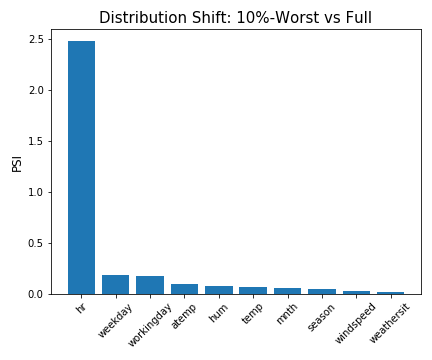

In [22]:
exp.model_diagnose(model='GAM',show='resilience_distance', figsize = (6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

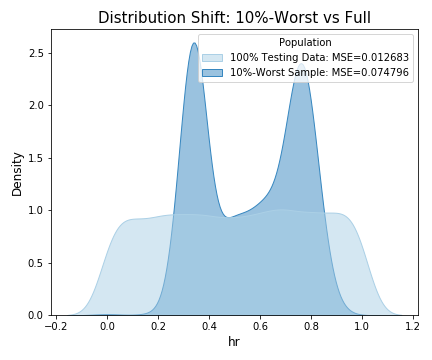

In [23]:
exp.model_diagnose(model='GAM', show='resilience_shift_density', show_feature='hr', figsize=(6, 5))

### Weakness detection using super-vised partitioning on test MSE

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

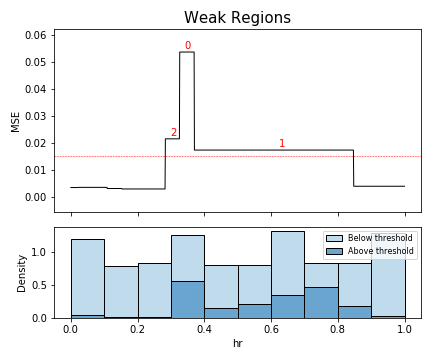

In [25]:
exp.model_diagnose(model='GAM', show='weakspot', slice_features=['hr'], 
                   slice_method='tree', threshold=1.2, min_samples=20, figsize=(6, 5), use_test=True)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

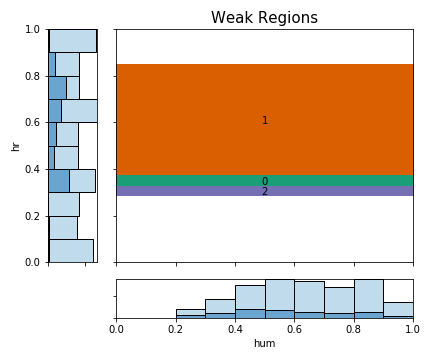

In [26]:
exp.model_diagnose(model='GAM', show='weakspot', slice_features=['hum','hr'], 
                   slice_method='tree', threshold=1.2, min_samples=20, figsize=(6, 5), use_test = True)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

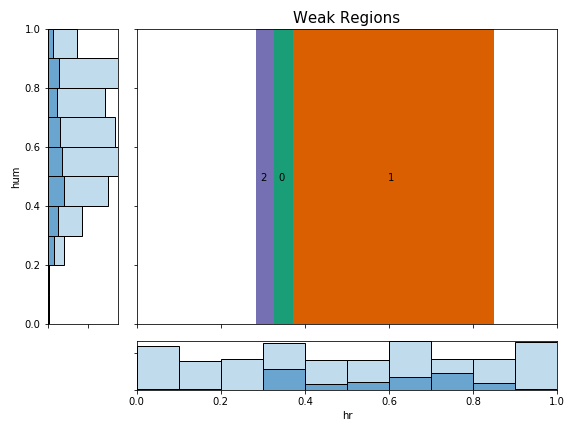

In [29]:
results = exp.model_diagnose(model='GAM', show='weakspot', slice_features=['hr', 'hum'], 
                   slice_method='tree', threshold=1.2, min_samples=20, return_data=True, use_test=True)

In [30]:
results.data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,[hr,hr),[hum,hum),#Test,#Train,test_MSE,train_MSE,Gap
0,0.326087,0.369565,0.0,1.0,287,440,0.053536,0.048877,0.004658
1,0.369565,0.847826,0.0,1.0,3232,4780,0.017262,0.017139,0.000123
2,0.282609,0.326087,0.0,1.0,295,432,0.021421,0.022753,-0.001332


## confirm results using conformal prediction

In [33]:
exp.model_diagnose(model='GAM', show='reliability_table', alpha=0.1)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,Empirical Coverage,Average Bandwidth
0,0.911151,0.237918


## Global weakness detection using residuals

In [34]:
pipeline = exp.get_model("GAM")
test_x, test_y, test_sample_weight = exp.get_data(test=True)
test_pred = pipeline.predict(test_x)
test_pred = test_pred.reshape(6952,1)
test_res = test_y - test_pred

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [35]:
test_res.shape

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

(6952, 1)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

Text(0.5, 0, 'residual')

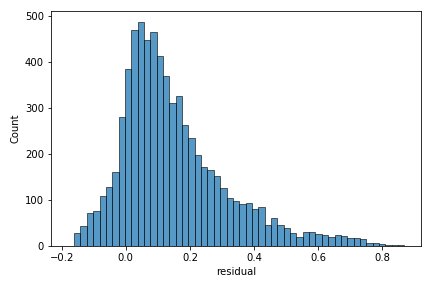

In [36]:
import matplotlib.pyplot as plt
plt.figure()
ax = sns.histplot(x = test_res[:,0])
ax.set_xlabel('residual')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

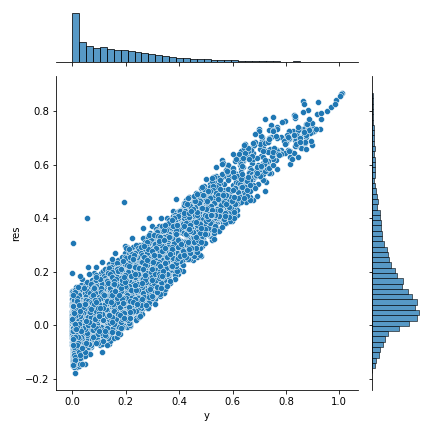

In [37]:
plt.figure()
ax = sns.jointplot(x = test_y[:,0],y =test_res[:,0] )
ax.set_axis_labels('y','res')

In [44]:
test_x_res = test_x.copy()
test_x_res = np.hstack((test_x_res, test_res))
test_x_res = pd.DataFrame(test_x_res, columns=exp.get_feature_names() + ["res"])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [45]:
test_x_res.shape

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

(6952, 11)

In [46]:
test_x_res.head()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,season,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,res
0,1.0,0.363636,0.217391,1.000000,0.0,0.0,0.551020,0.5303,0.88,0.263195,-0.006029
1,3.0,0.818182,0.173913,0.500000,1.0,0.0,0.428571,0.4394,0.88,0.000000,0.015067
2,3.0,0.818182,0.826087,0.666667,1.0,0.0,0.428571,0.4394,0.51,0.157870,0.742560
3,0.0,0.090909,0.478261,0.166667,0.0,0.0,0.244898,0.2273,0.48,0.421065,0.230445
4,1.0,0.454545,0.913043,0.833333,1.0,0.0,0.653061,0.6212,0.50,0.122840,0.239822


## load test data with residuals

In [47]:
expr = Experiment()
expr.data_loader(test_x_res)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,season,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,res
0,1.0,0.363636,0.217391,1.000000,0.0,0.0,0.551020,0.5303,0.88,0.263195,-0.006029
1,3.0,0.818182,0.173913,0.500000,1.0,0.0,0.428571,0.4394,0.88,0.000000,0.015067
2,3.0,0.818182,0.826087,0.666667,1.0,0.0,0.428571,0.4394,0.51,0.157870,0.742560
3,0.0,0.090909,0.478261,0.166667,0.0,0.0,0.244898,0.2273,0.48,0.421065,0.230445
4,1.0,0.454545,0.913043,0.833333,1.0,0.0,0.653061,0.6212,0.50,0.122840,0.239822
...,...,...,...,...,...,...,...,...,...,...,...
6947,1.0,0.272727,1.000000,0.000000,0.0,0.0,0.489796,0.4848,0.39,0.298225,0.016200
6948,3.0,0.909091,0.217391,0.666667,0.0,0.0,0.224490,0.2576,0.75,0.122840,0.046297
6949,2.0,0.454545,0.086957,0.000000,0.0,0.0,0.612245,0.6212,0.57,0.122840,-0.065504
6950,0.0,0.181818,0.695652,0.500000,1.0,1.0,0.387755,0.4091,0.76,0.193018,0.155003


In [48]:
expr.data_summary()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.…

In [49]:
expr.data_prepare(target='res', task_type='regression', test_ratio=0.1, random_state=0)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,Config,Value
0,Excluded columns,[]
1,Target variable,res
2,Sample weight,None
3,Task type,Regression
4,Split method,Random
5,Test ratio,0.1
6,Random state,0
7,Train test energy distance,0.001851


In [50]:
expr.model_train(model=XGBRegressor(max_depth = 6, learning_rate = 0.05,n_estimators = 300), name='XGB')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

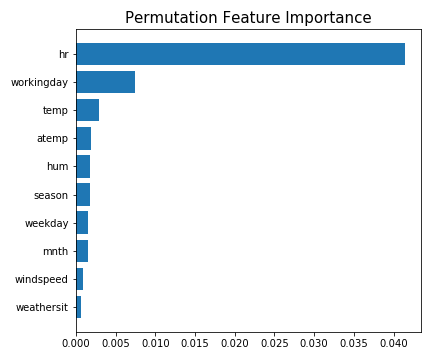

In [51]:
expr.model_explain(model = 'XGB',show = 'pfi', figsize=(6, 5))

In [52]:
##working day turns out important - due to interaction

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

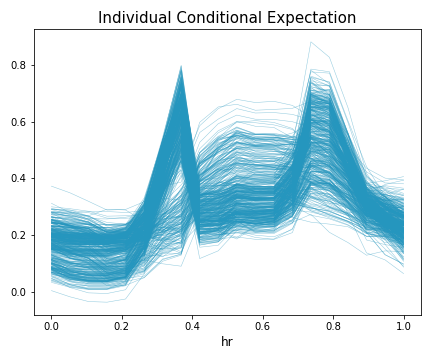

In [53]:
expr.model_explain(model = 'XGB',show = 'ice', uni_feature = 'hr', figsize=(6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

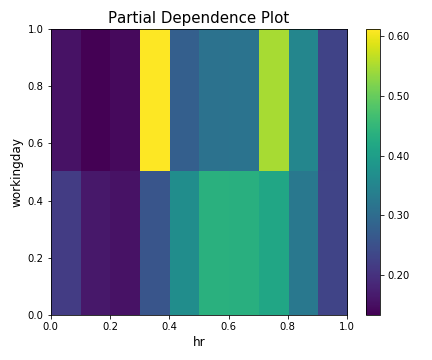

In [54]:
expr.model_explain(model = 'XGB',show = 'pdp', bi_features = ['hr','workingday'], figsize=(6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

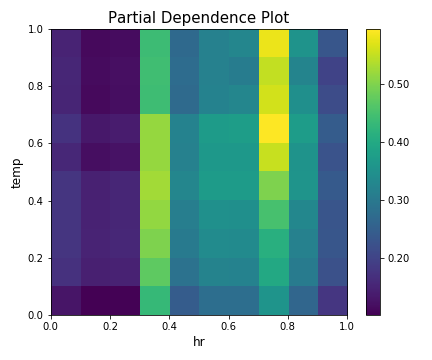

In [55]:
expr.model_explain(model = 'XGB',show = 'pdp', bi_features = ['hr','temp'], figsize=(6, 5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

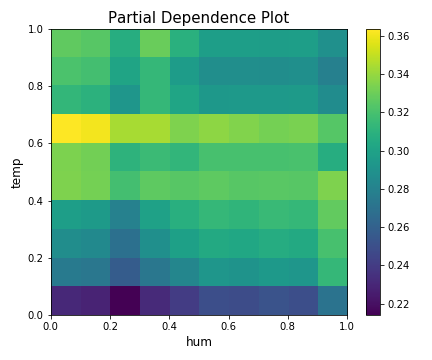

In [56]:
expr.model_explain(model = 'XGB',show = 'pdp', bi_features = ['hum','temp'], figsize=(6, 5))